# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

## Reading dataset

In [3]:
df = pd.read_csv(r"C:\Users\deepa\Downloads\world_energy_data.csv")
df.head()

,Unnamed: 0,Coal Data,Unnamed: 2,Natural Gas,Unnamed: 4,Electricity,Unnamed: 6,Co2 Emissions,Unnamed: 8
0,year,world_cons,world_prod,world_prod,world_cons,world_prod,world_cons,world,NaN
1,1990,4693,4698,2057,2047,11875,10120,20376,NaN
2,1991,4614,4526,2099,2107,12152,10436,20532,NaN
3,1992,4558,4478,2099,2101,12262,10525,20450,NaN
4,1993,4538,4361,2147,2136,12550,10724,20552,NaN


In [5]:
# Taking out the emission data
emission_df = df[['Unnamed: 0','Co2 Emissions']]

In [8]:
# Dropping reduntant rows
emission_df.drop([0,0],axis=0,inplace=True)

In [11]:
# changing column names
emission_df.columns = ['year','emission']

In [13]:
emission_df.head()

,year,emission
1,1990,20376
2,1991,20532
3,1992,20450
4,1993,20552
5,1994,20632


In [14]:
# chnging type of year column into datetime
emission_df['year'] = pd.to_datetime(emission_df['year'])

In [17]:
emission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 33
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      33 non-null     datetime64[ns]
 1   emission  33 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 792.0+ bytes


In [18]:
# changing data type into integer
emission_df['emission'] = emission_df.emission.astype(int)

In [19]:
emission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 33
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      33 non-null     datetime64[ns]
 1   emission  33 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 660.0 bytes


In [22]:
emission_df.describe()

,emission
count,33.000000
mean,26818.151515
std,4767.207949
min,20376.000000
25%,22067.000000
50%,27483.000000
75%,31682.000000
max,33811.000000


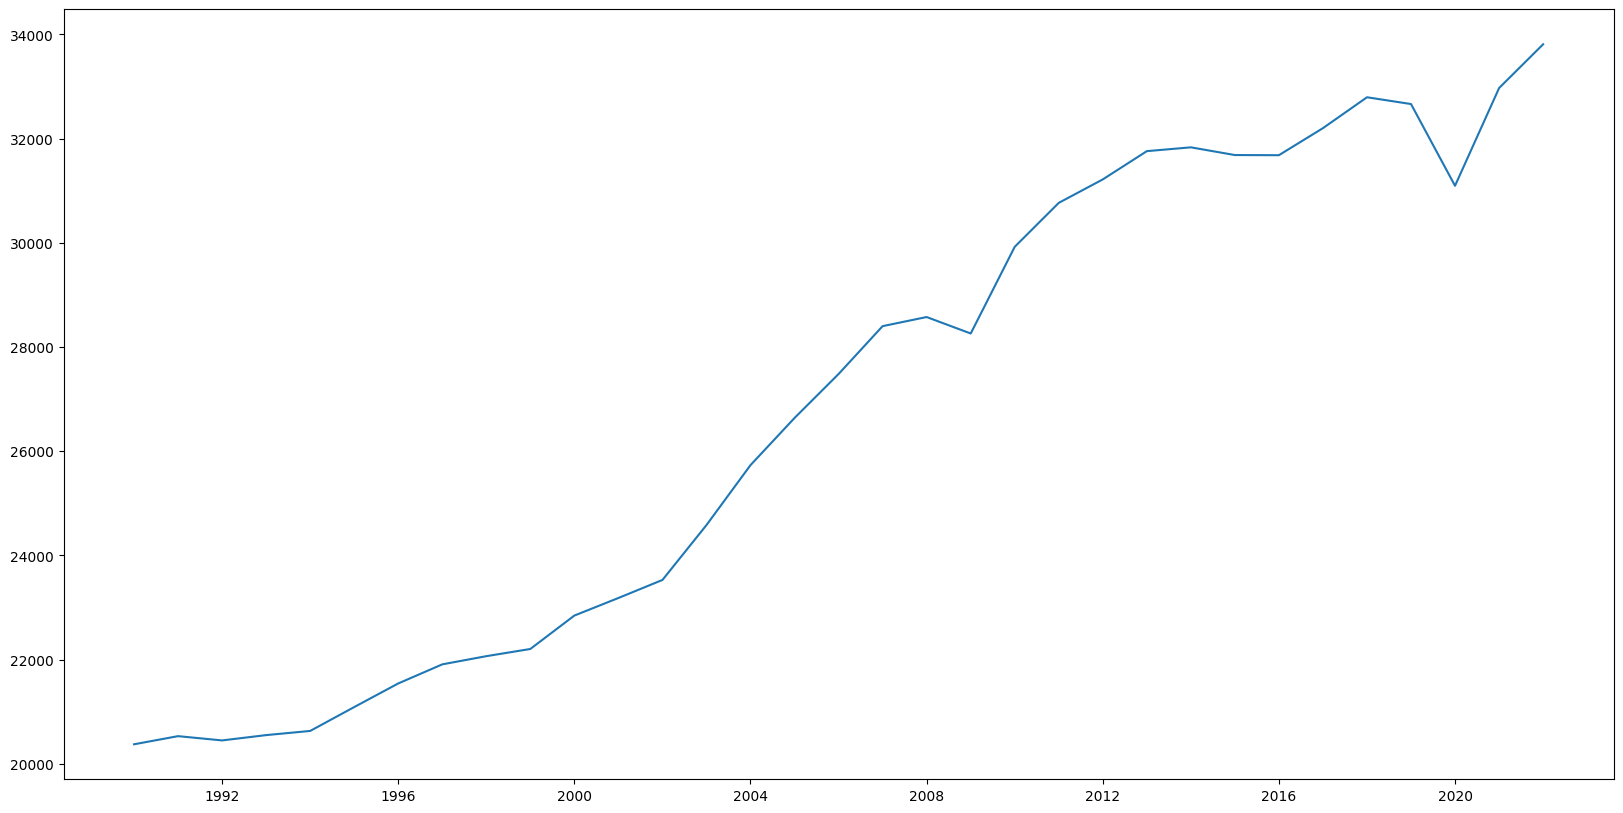

In [54]:
# plotting given data 
plt.figure(figsize=(20,10))
plt.plot('year','emission',data=emission_df)

In [20]:
import statsmodels.api as sm

In [21]:
# Performing durbin watson test to check the autocorrelation
sm.stats.durbin_watson(emission_df['emission'])

-0.013415542018681663

## Import Facebook Prophet Model

In [ ]:
#!pip install pystan

In [ ]:
#pip install prophet

In [23]:
import prophet

In [24]:
#Renaming columns of dataset to use them into facebook prophet model
df_prophet = emission_df.rename(columns={'year':'ds', 'emission':'y'})

In [26]:
df_prophet.head()

,ds,y
1,1990-01-01,20376
2,1991-01-01,20532
3,1992-01-01,20450
4,1993-01-01,20552
5,1994-01-01,20632


In [27]:
from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

21:31:07 - cmdstanpy - INFO - Chain [1] start processing
21:31:08 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [29]:
model

In [30]:
future_pred = model.make_future_dataframe(periods=10, freq='Y')

In [32]:
future_pred.tail(10)

,ds
33,2022-12-31
34,2023-12-31
35,2024-12-31
36,2025-12-31
37,2026-12-31
38,2027-12-31
39,2028-12-31
40,2029-12-31
41,2030-12-31
42,2031-12-31


## Predicting future forecasting

In [33]:
prediction = model.predict(future_pred)

In [34]:
prediction.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,-10242.907206,19504.193258,20544.690520,-10242.907206,-10242.907206,30276.291217,30276.291217,30276.291217,30276.291217,30276.291217,30276.291217,0.0,0.0,0.0,20033.384011
1,1991-01-01,-9971.021595,19700.980618,20785.410881,-9971.021595,-9971.021595,30228.018959,30228.018959,30228.018959,30228.018959,30228.018959,30228.018959,0.0,0.0,0.0,20256.997364


In [35]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
33,2022-12-31,30844.568213,30319.407123,31369.167623
34,2023-12-31,29791.837376,29286.428825,30404.457406
35,2024-12-31,33048.700711,32438.137571,33654.297526
36,2025-12-31,32475.894154,31860.778618,33079.560933
37,2026-12-31,31662.253817,31003.010986,32314.278448
38,2027-12-31,30609.522981,29877.438861,31324.723576
39,2028-12-31,33866.386316,33100.602179,34631.705156
40,2029-12-31,33293.579759,32382.984147,34176.622829
41,2030-12-31,32479.939422,31472.708294,33507.367917
42,2031-12-31,31427.208586,30349.673045,32593.732304


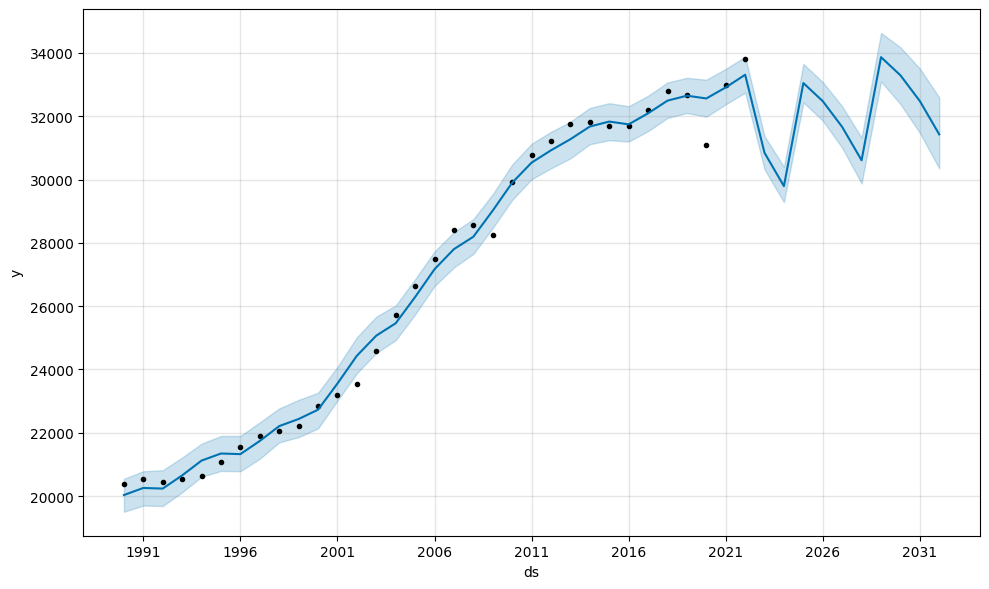

In [36]:
# plot the model 
model.plot(prediction)
plt.show()

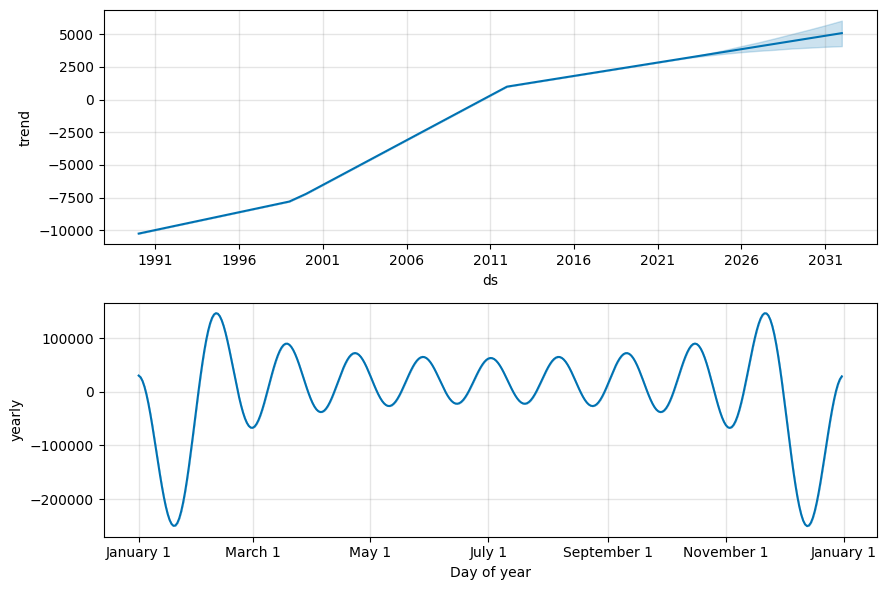

In [37]:
model.plot_components(prediction)
plt.show()

## To check the performance - cross validation and performance metrics

In [38]:
from prophet.diagnostics import cross_validation

In [42]:
df_cv = cross_validation(model, horizon='365 days', period='365 days', initial='1095 days')

  0%|          | 0/29 [00:00<?, ?it/s]

21:40:21 - cmdstanpy - INFO - Chain [1] start processing
21:40:22 - cmdstanpy - INFO - Chain [1] done processing
21:40:22 - cmdstanpy - INFO - Chain [1] start processing
21:40:36 - cmdstanpy - INFO - Chain [1] done processing
21:40:36 - cmdstanpy - INFO - Chain [1] start processing
21:40:36 - cmdstanpy - INFO - Chain [1] done processing
21:40:37 - cmdstanpy - INFO - Chain [1] start processing
21:40:54 - cmdstanpy - INFO - Chain [1] done processing
21:40:54 - cmdstanpy - INFO - Chain [1] start processing
21:41:11 - cmdstanpy - INFO - Chain [1] done processing
21:41:11 - cmdstanpy - INFO - Chain [1] start processing
21:41:29 - cmdstanpy - INFO - Chain [1] done processing
21:41:30 - cmdstanpy - INFO - Chain [1] start processing
21:41:49 - cmdstanpy - INFO - Chain [1] done processing
21:41:50 - cmdstanpy - INFO - Chain [1] start processing
21:41:50 - cmdstanpy - INFO - Chain [1] done processing
21:41:50 - cmdstanpy - INFO - Chain [1] start processing
21:41:50 - cmdstanpy - INFO - Chain [1]

In [43]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1994-01-01,20950.197399,20949.539007,20950.898919,20632,1993-01-08
1,1995-01-01,20706.550092,20625.474337,20790.946297,21090,1994-01-08
2,1996-01-01,21248.343827,21141.027253,21356.702376,21543,1995-01-08
3,1997-01-01,22052.774589,21931.800275,22169.289271,21910,1996-01-08
4,1998-01-01,22484.436391,22352.793707,22638.714455,22067,1997-01-07


In [44]:
from prophet.diagnostics import performance_metrics

In [45]:
df_performance = performance_metrics(df_cv)

In [46]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,358 days,1.117019e+05,334.218330,332.101160,0.015761,0.015423,0.015808,0.00
1,359 days,1.214916e+05,348.556409,307.864514,0.013752,0.012924,0.013762,0.00
2,360 days,2.091832e+05,457.365503,389.676284,0.015706,0.016872,0.015874,0.25
3,361 days,2.706274e+05,520.218577,391.386234,0.013923,0.008747,0.013797,0.25
4,362 days,7.182744e+05,847.510684,503.374830,0.017558,0.004528,0.017125,0.75
5,363 days,1.271997e+06,1127.828585,956.440486,0.030158,0.033257,0.029539,0.25
6,364 days,1.014649e+06,1007.297772,704.584706,0.022370,0.014287,0.021864,0.50
7,365 days,5.075368e+05,712.416147,701.548288,0.020966,0.020966,0.021195,0.00


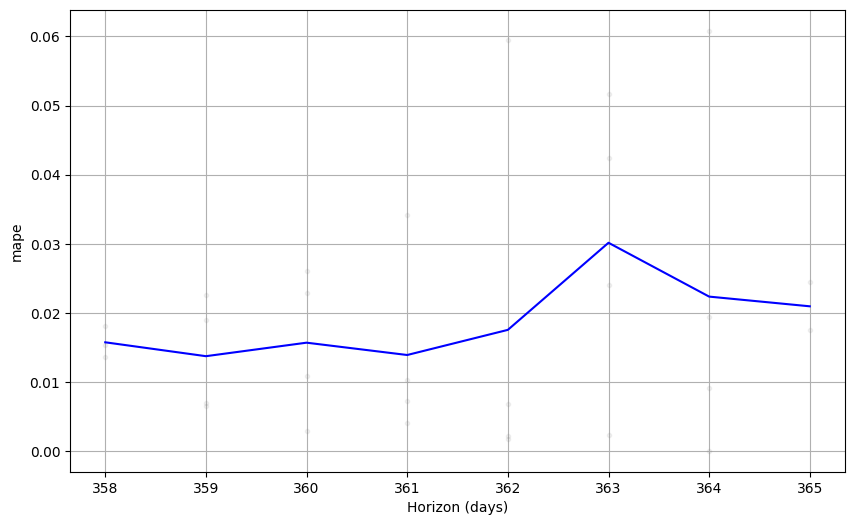

In [47]:
# Visualise
from prophet.plot import plot_cross_validation_metric
df_performance = plot_cross_validation_metric(df_cv, metric='mape')

In [56]:
prediction.to_csv('emission_prediction_data.csv')